In [93]:
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import numpy as np
from scipy import optimize


In [94]:
T = 150

In [95]:
df = pd.read_csv('%dK_and_0degree.csv' %T)
df

,Unnamed: 0,Temperature,Position,Magnetic field (Oe),Rxx,Rxy
0,0,150.00265,0.0,69289.9220,NaN,0.272681
1,1,150.00065,0.0,67860.2730,40.396149,NaN
2,2,150.00120,0.0,66351.2425,NaN,0.282697
3,3,150.00155,0.0,64905.4340,40.404151,NaN
4,4,150.00135,0.0,63281.6855,NaN,0.293246
...,...,...,...,...,...,...
185,185,149.99755,0.0,67984.9140,40.462903,NaN
186,186,150.00230,0.0,69570.6720,NaN,0.272739
187,187,150.00170,0.0,69998.5585,40.462835,NaN
188,188,149.99935,0.0,70000.5000,NaN,0.270830


In [96]:
df=df.drop(labels =['Unnamed: 0'],axis = 1)

In [97]:
df['Magnetic field (T)']=df['Magnetic field (Oe)']/10000

df_xy=df[['Magnetic field (T)','Rxy']]

In [98]:
df_xy=df_xy.dropna(axis=0,how='any',inplace = False)

In [99]:
w=5*10**-6
L=40*10**-6
t=70*10**-9
df_xy['Resistivity(uOhm-m)']=df['Rxy']*(w*t/L)*10**6


In [100]:
df_xy

,Magnetic field (T),Rxy,Resistivity(uOhm-m)
0,6.928992,0.272681,0.002386
2,6.635124,0.282697,0.002474
4,6.328169,0.293246,0.002566
6,6.032968,0.303399,0.002655
8,5.730274,0.313868,0.002746
...,...,...,...
180,6.052709,0.303555,0.002656
182,6.357425,0.293072,0.002564
184,6.662056,0.282690,0.002474
186,6.957067,0.272739,0.002386


In [101]:
df_xy.iloc[0]

Magnetic field (T)     6.928992
Rxy                    0.272681
Resistivity(uOhm-m)    0.002386
Name: 0, dtype: float64

In [102]:
#shift data to make it cross (0,0)
l=[]
l2=[]
a=0
thr=0.24
while a<len(df_xy):
    if abs(df_xy.iloc[a]['Magnetic field (T)']-0)<thr:
        l.append(df_xy.iloc[a]['Resistivity(uOhm-m)']) 
        l2.append(df_xy.iloc[a]['Magnetic field (T)'])
    a+=1
global mean
mean=sum(l)/len(l)
df_xy['delta Resistivity(uOhm-m)']=(df_xy['Resistivity(uOhm-m)']-mean)
l2

[0.03520025, -0.03832815]

Text(0, 0.5, 'R$_{xy}$($Ω$)')

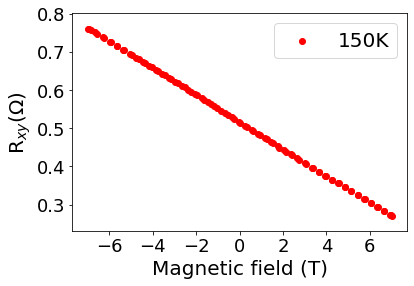

In [103]:
x=np.array(df_xy['Magnetic field (T)'])
y=np.array(df_xy['Rxy'])
plt.scatter(x, y, label='%dK'%T,color='red')
plt.legend(loc='best',fontsize=20)
#plt.ylim(0, 800)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Magnetic field (T)',fontsize=20)
plt.ylabel('R$_{xy}$($\u03A9$)',fontsize=20)

In [104]:
x150=np.array(df_xy['Magnetic field (T)'])
y150=np.array(df_xy['delta Resistivity(uOhm-m)'])


Text(0, 0.5, '$\\rho$$_{xy}$ (u$Ω$-m)')

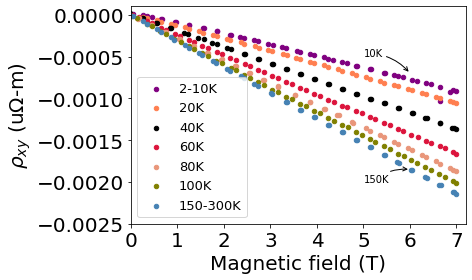

In [118]:
x=np.array(df_xy['Magnetic field (T)'])
y=np.array(df_xy['delta Resistivity(uOhm-m)'])
#plt.scatter(x2, y2, label= '2K',color='blue',s=20)
#plt.scatter(x4, y4, label= '4K',color='red',s=20)
#plt.scatter(x6, y6, label= '6K',color='green',s=20)
#plt.scatter(x8, y8, label= '8K',color='orange',s=20)
plt.scatter(x10, y10, label= '2-10K',color='purple',s=20)
plt.scatter(x20, y20, label= '20K',color='coral',s=20)
plt.scatter(x40, y40, label= '40K',color='black',s=20)
plt.scatter(x60, y60, label= '60K',color='crimson',s=20)
plt.scatter(x80, y80, label= '80K',color='darksalmon',s=20)
plt.scatter(x100, y100, label= '100K',color='olive',s=20)
plt.scatter(x150, y150, label= '150-300K',color='steelblue',s=20)
#plt.scatter(x200, y200, label= '200K',color='violet',s=20)
#plt.scatter(x250, y250, label= '250K',color='darkgrey',s=20)
#plt.scatter(x300, y300, label= '300K',color='sienna',s=20)
plt.legend(loc='best',fontsize=13)
#plt.ylim(0, 0.5*10**-8)
plt.ylim(-0.0025, 0.0001)
plt.xlim(0,7.2)
#plt.ticklabel_format(style='scientific', axis='y', scilimits=(-3,-3), useMathText=True,useOffset=True)
plt.annotate(s="10K", xy=(6,-0.0007), xytext=(5,-0.0005), arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=-.2"))
plt.annotate(s="150K", xy=(6,-0.00185), xytext=(5,-0.002), arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=-.2"))
#plt.grid(axis = 'both')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Magnetic field (T)',fontsize=20)
plt.ylabel('$\\rho$$_{xy}$ (u$\u03A9$-m)',fontsize=20)

In [106]:
plt.savefig('Customed Plot.png', dpi=800, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>